In [1]:
import numpy as np
from numpy.linalg import svd

In [2]:
A=np.array([[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,4,0,0,0]])

In [3]:
U,d,Vt=svd(A)

In [4]:
print(U)
print(d)
print(Vt)

[[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [-1.  0.  0.  0.]]
[4.         3.         2.23606798 0.        ]
[[ 0.         -1.          0.          0.          0.        ]
 [-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


In [5]:
print(np.diag(d))

[[4.         0.         0.         0.        ]
 [0.         3.         0.         0.        ]
 [0.         0.         2.23606798 0.        ]
 [0.         0.         0.         0.        ]]


In [7]:
#SVD applying to a dataset
import pandas as pd
data=pd.read_excel('University_Clustering.xlsx')

In [8]:
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [9]:
data=data.iloc[:,2:]

In [10]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=3)
svd.fit(data)

TruncatedSVD(n_components=3)

In [11]:
result=pd.DataFrame(svd.transform(data))

In [12]:
result.head()

,0,1,2
0,22737.587399,454.514059,-25.702416
1,63583.170928,-990.046543,12.221911
2,25055.946462,315.640243,24.117560
3,31537.214404,119.844228,-8.256362
4,21897.045349,456.472762,-13.370650


In [13]:
result.columns="pc0","pc1","pc2"

In [14]:
result.head()

,pc0,pc1,pc2
0,22737.587399,454.514059,-25.702416
1,63583.170928,-990.046543,12.221911
2,25055.946462,315.640243,24.117560
3,31537.214404,119.844228,-8.256362
4,21897.045349,456.472762,-13.370650


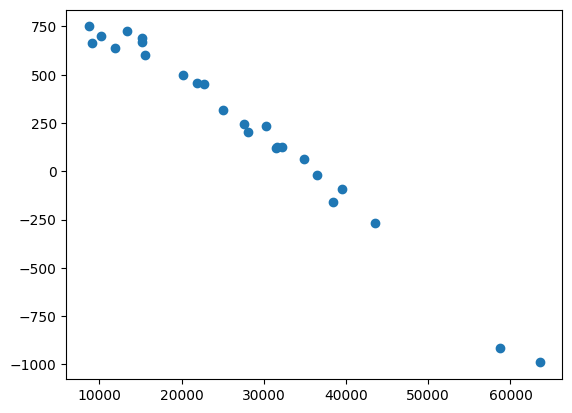

In [15]:
#Scatter diagram
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x=result.pc0,y=result.pc1)

In [16]:
import pandas as pd
import numpy as np

In [18]:
univ1=pd.read_excel('University_Clustering.xlsx')
univ1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [19]:
univ1=univ1.drop(['State'],axis=1)

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


In [21]:
univ1.data=univ1.iloc[:,1:]
#normalizing numerical data
uni_normal=scale(univ1.data)
uni_normal

<ipython-input-21-427d41ab47d2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  univ1.data=univ1.iloc[:,1:]


array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [24]:
pca=PCA(n_components=6)
pca_values=pca.fit_transform(uni_normal)
var=pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [26]:
#PCA weight
pca.components_
pca.components_[0]

array([ 0.45774863,  0.42714437, -0.42430805, -0.39064831,  0.36252316,
        0.37940403])

In [27]:
#to check the cumulative variance
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])